In [ ]:
# Name : 
# Assignment Number & Name : EDA - NHL Win Classification (With Event-Level Features)
# I pledge my honor that I have abided by the Stevens Honor System.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the enhanced dataset with shot-level features
df = pd.read_csv('merged_with_event_features.csv')

# Drop rows with missing essential values
df.dropna(subset=['won', 'shots', 'hits', 'pim', 'powerPlayGoals', 
                  'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked'], inplace=True)

# Convert 'won' to binary integer
df['won'] = df['won'].astype(int)

# Display first few rows
df.head()

,play_id,game_id,team_id_for_x,team_id_against,event,secondaryType,x,y,team_id,HoA,...,startRinkSide,won,team_id_for_y,avg_shot_x,avg_shot_y,num_close_range_shots,num_slap_shot,num_wrist_shot,num_backhand,num_tip-in
0,2016020045_1,2016020045,NaN,NaN,Game Scheduled,NaN,NaN,NaN,4,away,...,left,0,4.0,17.962963,-5.296296,0.0,6.0,36.0,6.0,4.0
1,2016020045_1,2016020045,NaN,NaN,Game Scheduled,NaN,NaN,NaN,16,home,...,left,1,16.0,-10.392857,-2.857143,0.0,14.0,32.0,6.0,0.0
2,2016020045_2,2016020045,NaN,NaN,Period Ready,NaN,NaN,NaN,4,away,...,left,0,4.0,17.962963,-5.296296,0.0,6.0,36.0,6.0,4.0
3,2016020045_2,2016020045,NaN,NaN,Period Ready,NaN,NaN,NaN,16,home,...,left,1,16.0,-10.392857,-2.857143,0.0,14.0,32.0,6.0,0.0
4,2016020045_3,2016020045,NaN,NaN,Period Start,NaN,NaN,NaN,4,away,...,left,0,4.0,17.962963,-5.296296,0.0,6.0,36.0,6.0,4.0


In [7]:
# Show descriptive statistics of numeric columns
print(df.describe())

            game_id  team_id_for_x  team_id_against             x  \
count  3.653800e+04   29440.000000     29440.000000  29374.000000   
mean   2.016021e+09      19.504755        19.681861      0.537823   
std    3.159456e+02      14.822133        14.986931     64.139055   
min    2.016020e+09       1.000000         1.000000    -99.000000   
25%    2.016020e+09       9.000000         9.000000    -68.000000   
50%    2.016021e+09      16.000000        16.000000      0.000000   
75%    2.016021e+09      26.000000        26.000000     69.000000   
max    2.016021e+09      53.000000        53.000000     99.000000   

                  y       team_id         shots          hits           pim  \
count  29374.000000  36538.000000  36538.000000  36538.000000  36538.000000   
mean      -0.194934     19.636433     30.754201     22.451092      9.929662   
std       23.283882     14.878139      7.575772      7.530658     12.351742   
min      -42.000000      1.000000     15.000000      4.000000 

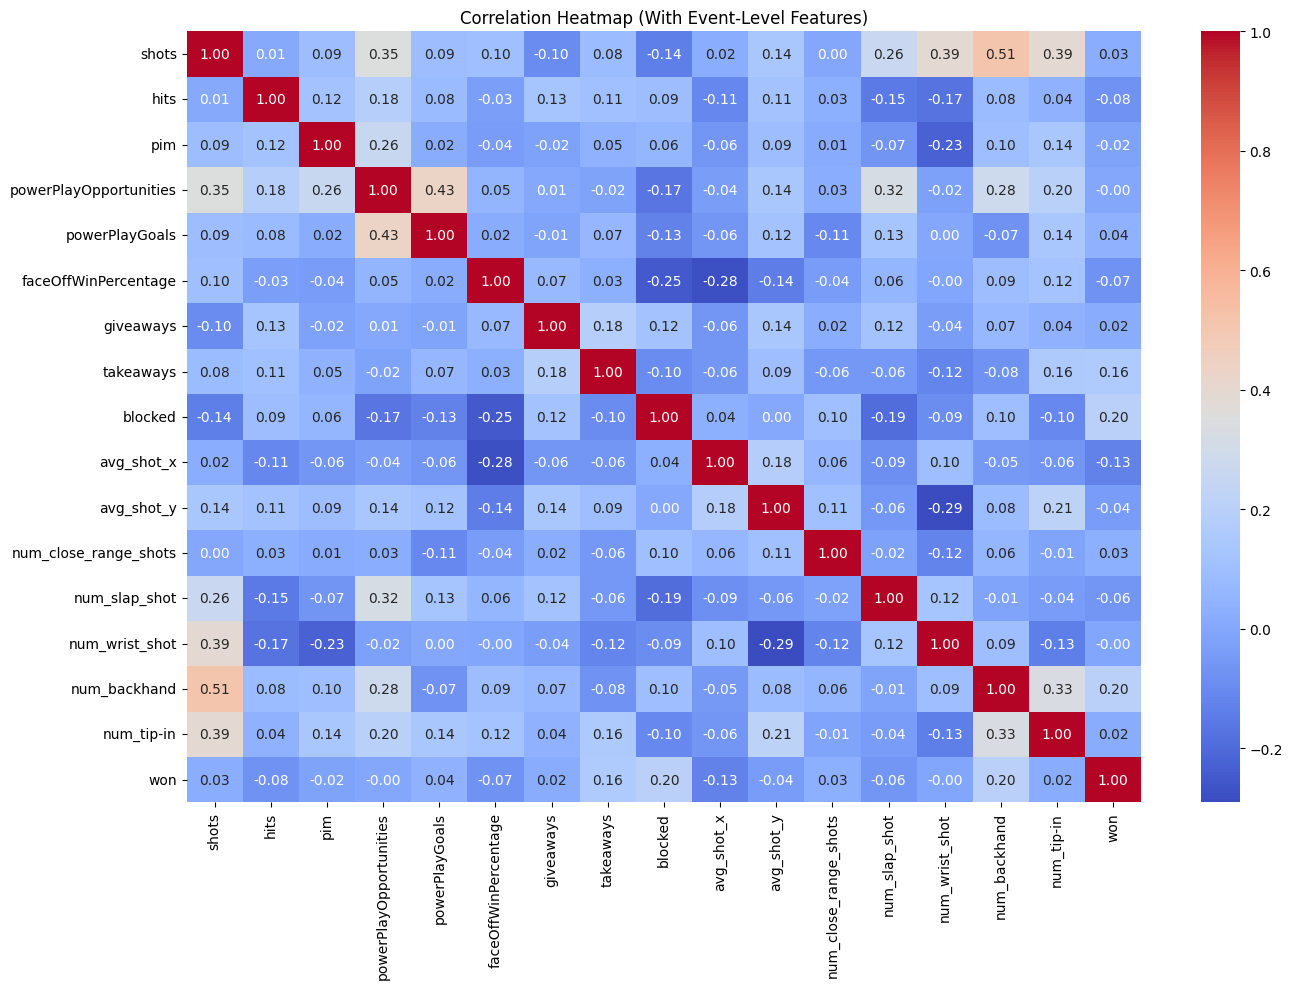

In [8]:
# Correlation heatmap with event-level features
features = ['shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
            'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
            'avg_shot_x', 'avg_shot_y', 'num_close_range_shots',
            'num_slap_shot', 'num_wrist_shot', 'num_backhand', 'num_tip-in', 'won']

numeric_only = df[features].select_dtypes(include='number')

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_only.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (With Event-Level Features)")
plt.tight_layout()
plt.show()

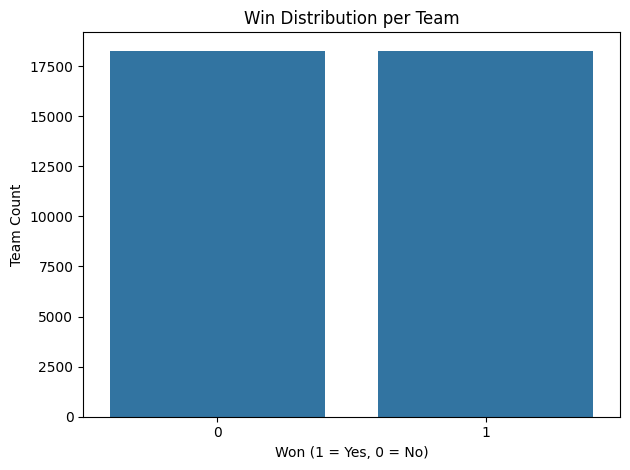

In [9]:
# Win distribution per team
sns.countplot(data=df, x='won')
plt.title("Win Distribution per Team")
plt.xlabel("Won (1 = Yes, 0 = No)")
plt.ylabel("Team Count")
plt.tight_layout()
plt.show()

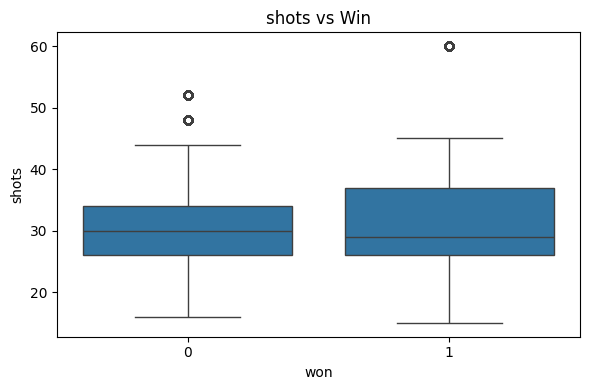

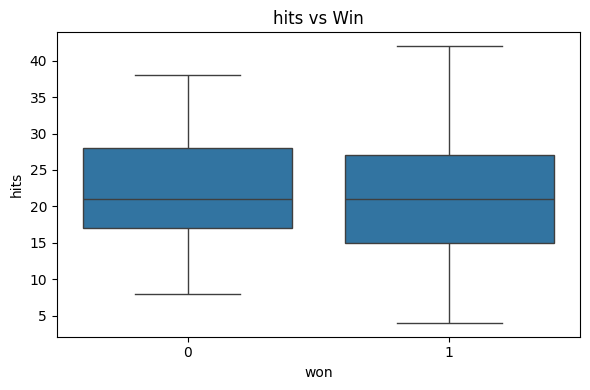

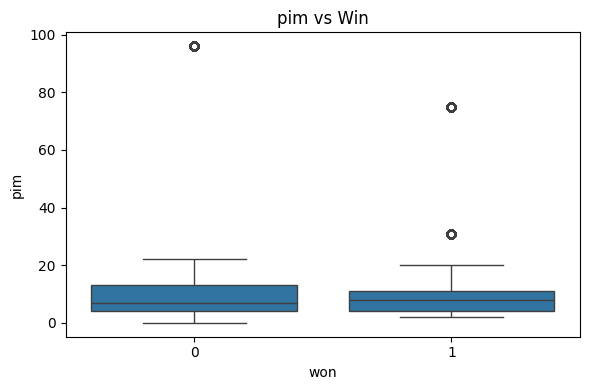

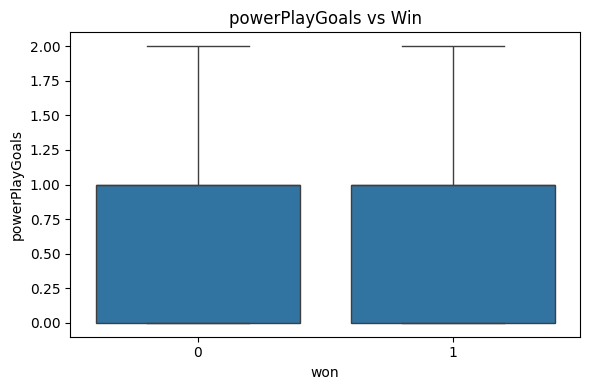

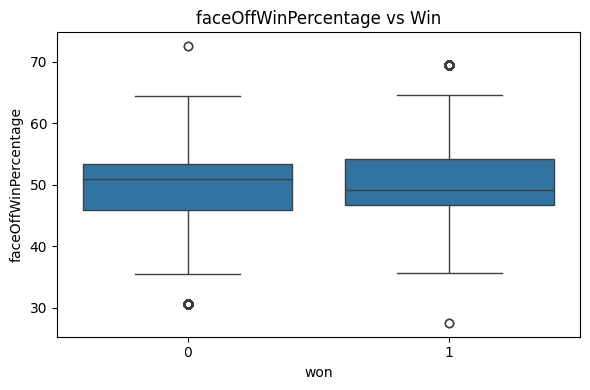

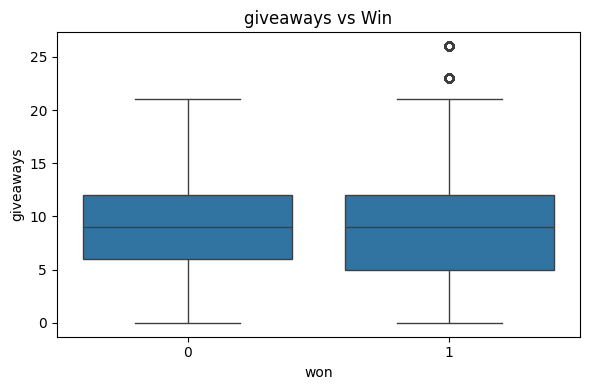

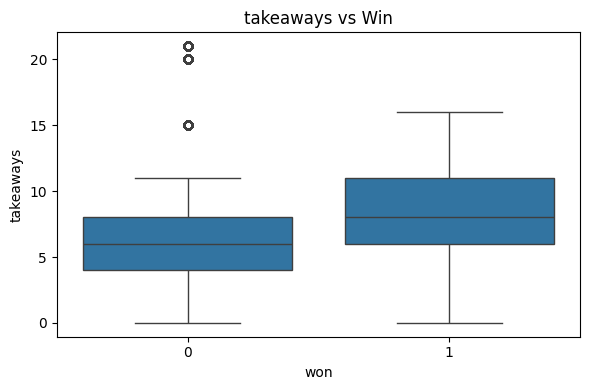

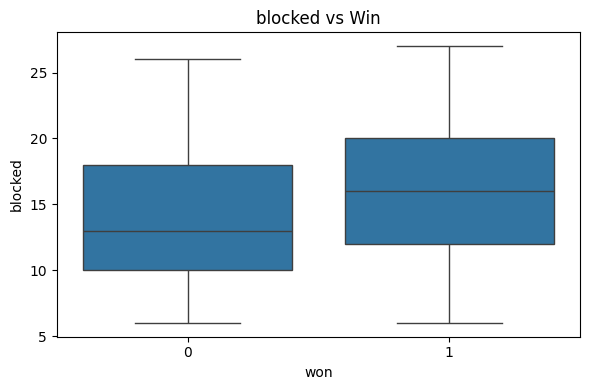

In [10]:
# Boxplots of core features vs win
features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage',
            'giveaways', 'takeaways', 'blocked']
for f in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='won', y=f)
    plt.title(f"{f} vs Win")
    plt.tight_layout()
    plt.show()

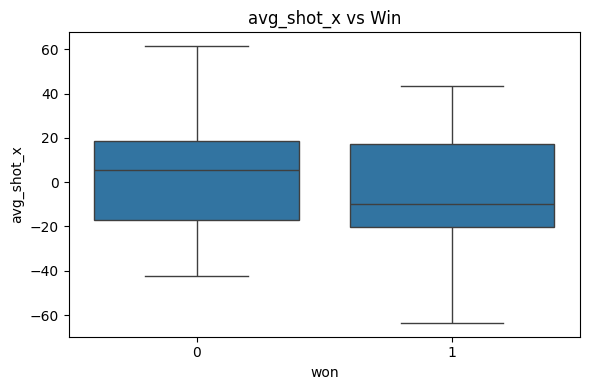

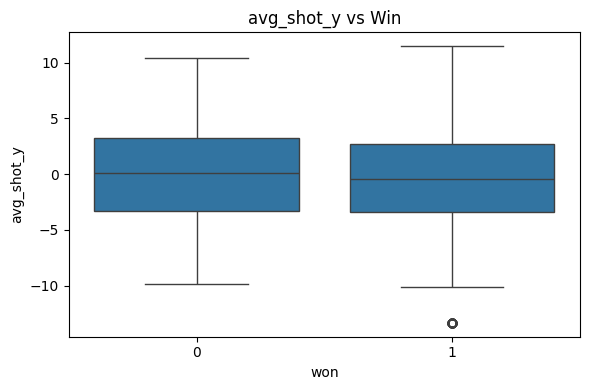

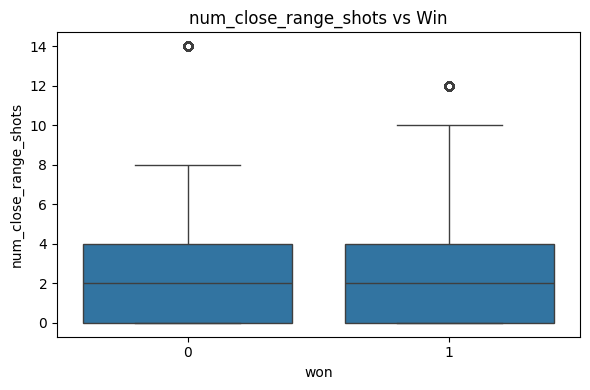

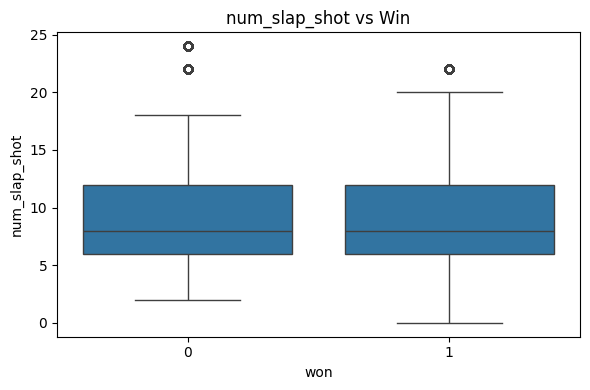

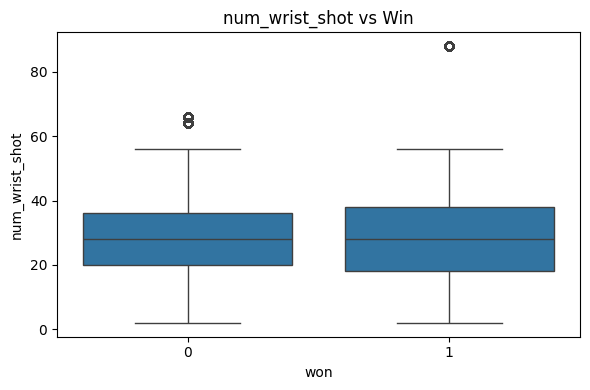

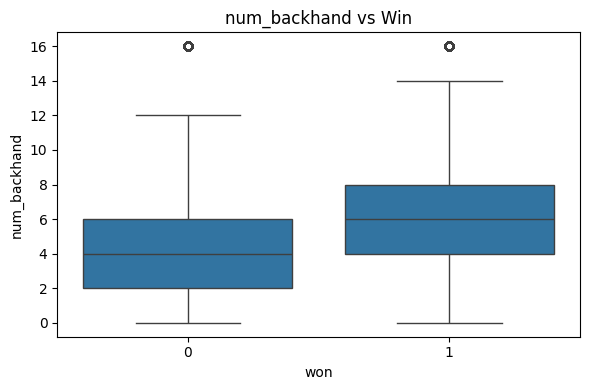

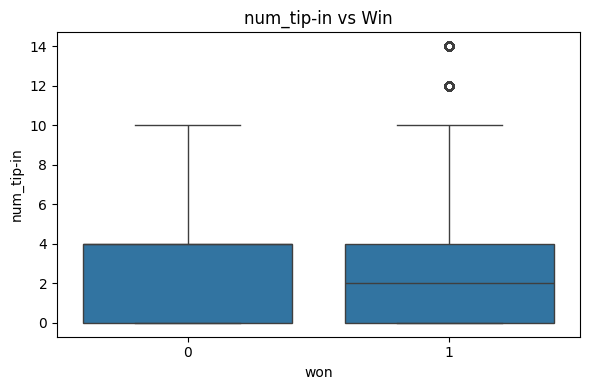

In [11]:
# Boxplots of shot features vs win
shot_features = ['avg_shot_x', 'avg_shot_y', 'num_close_range_shots',
                 'num_slap_shot', 'num_wrist_shot', 'num_backhand', 'num_tip-in']
for f in shot_features:
    if f in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x='won', y=f)
        plt.title(f"{f} vs Win")
        plt.tight_layout()
        plt.show()